**Plots tracer swarm variables alond transects by different craton geometry**

In [1]:
# import underworld as uw
import math
# from underworld import function as fn
# import glucifer
import os
import numpy as np
import h5py
from shutil import copyfile
import glob

import matplotlib.pyplot as pyplot
%matplotlib inline

/Users/rfarrington/Underworld/Underworld2-development/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
inputPath = os.path.join(
                         "/Users/rfarrington/OneDrive - The University of Melbourne/Research/08_CratonStability/"
                        )

In [3]:
SlabOnly            = []
CratonOnlyStep      = []
CratonSlabStep      = []
CratonOnlyDiagonal  = []
CratonSlabDiagonal  = []
CratonOnlyStraight  = []
CratonSlabStraight  = []
CratonOnlyStraight2 = []
CratonSlabStraight2 = []

In [4]:
modelRunDict = {
    "3 CratonSlab-step"       : CratonSlabStep,
    "5 CratonSlab-diagonal"   : CratonSlabDiagonal,
    "7 CratonSlab-straight"   : CratonSlabStraight,
    "9 CratonSlab-straight2"  : CratonSlabStraight2,
                }

In [5]:
modelRunDict_cratonOnly = {
    "1 SlabOnly"              : SlabOnly, 
    "2 CratonOnly-step"       : CratonOnlyStep,
    "4 CratonOnly-diagonal"   : CratonOnlyDiagonal,
    "6 CratonOnly-straight"   : CratonOnlyStraight,
    "8 CratonOnly-straight2"  : CratonOnlyStraight2,
                 }

In [6]:
# # read in reference temperature profile for craton shape
# swarmDict = {
#             'y130+x660', 
# #            'y200+x990', 
#             }

In [7]:
# # create plot dictionary
swarmDict = {
            'y130+x660', 
#            'y130+x825', 
#            'y130+x990', 
#            'y200+x660', 
#            'y200+x825', 
#            'y200+x990', 
           }

In [8]:
for model in sorted(modelRunDict):
    for swarm in sorted(swarmDict):
        # read swarm coordinates
        pathCoord = inputPath+model+'/'+swarm+'.h5'
        print pathCoord
        hfCoord = h5py.File(glob.glob(pathCoord)[0], "r")
        coord = hfCoord.get('data').value
        # read in variable data
        path = inputPath+model+'/'+swarm+'_temperatureField.h5'
        for fname in glob.glob(path):
            hf = h5py.File(fname, "r")
            data = hf.get('data').value
            modelRunDict[model] = np.array(list(data))

/Users/rfarrington/OneDrive - The University of Melbourne/Research/08_CratonStability/3 CratonSlab-step/y130+x660.h5
/Users/rfarrington/OneDrive - The University of Melbourne/Research/08_CratonStability/5 CratonSlab-diagonal/y130+x660.h5
/Users/rfarrington/OneDrive - The University of Melbourne/Research/08_CratonStability/7 CratonSlab-straight/y130+x660.h5
/Users/rfarrington/OneDrive - The University of Melbourne/Research/08_CratonStability/9 CratonSlab-straight2/y130+x660.h5


In [9]:
pathCoord

'/Users/rfarrington/OneDrive - The University of Melbourne/Research/08_CratonStability/9 CratonSlab-straight2/y130+x660.h5'

In [10]:
# use line at 1400 K to determine when we're within the craton
tempContour = (1400-300)/(1573.-300.)
print tempContour

0.864100549882


In [11]:
# create scaled Z axis array, km
zInKm = (coord[:,2]+1.5)*1000

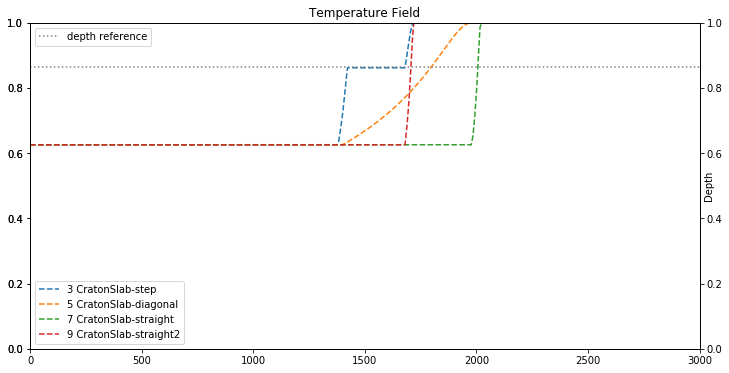

In [12]:
fig, (plot) = pyplot.subplots(1,1)
fig.set_size_inches(12, 6) 

#plot craton and slab location for reference
plot = plot.twinx()
for model in sorted(modelRunDict):
    plot.plot(zInKm, modelRunDict[model], label=model, linestyle='--')
plot.axis([0, 3e3, 0, 1])
plot.legend(loc='upper left')
plot.set_xlabel('Width (km)')
plot.set_ylabel('Temperature')
plot.legend(loc='lower left')
plot.axis('on')

plot2 = plot.twinx()
plot2.axis([0, 3e3, 0, 1])
plot2.axhline(tempContour, label='depth reference', linestyle=':', color='grey')
plot2.legend(loc='upper left')
plot.set_ylabel('Depth')
#plot2.axis('off')

pyplot.title('Temperature Field')
pyplot.show()

In [13]:
# create field dictionary
fieldDict = {
            'dissipationField'     , 
            'pressureField'        ,
            'strainRateField'      ,
            'stressField'          ,
            'temperatureField'     ,
            'velocityField'        ,
            'velocityGradientField',
            'viscosityField'       ,
            'vorticityXField'      ,
            'vorticityYField'      ,
            'vorticityZField'      ,
            }

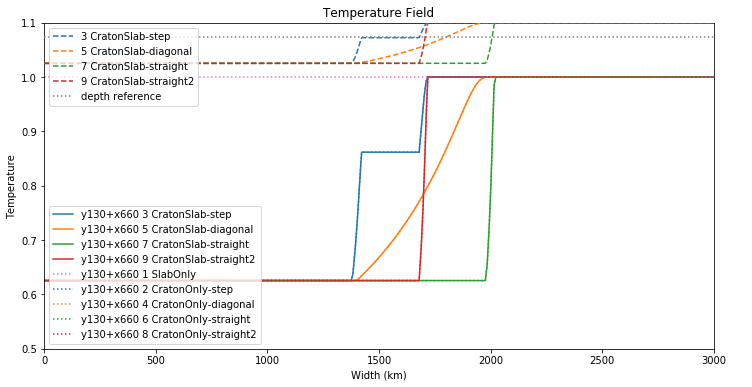

In [14]:
fig, (plot) = pyplot.subplots(1,1)
fig.set_size_inches(12, 6) 

for model in sorted(modelRunDict):
    for swarm in sorted(swarmDict):
        # read swarm coordinates
        pathCoord = inputPath+model+'/'+swarm+'.h5'
        hfCoord = h5py.File(glob.glob(pathCoord)[0], "r")
        coord = hfCoord.get('data').value
        # read in variable data
        path = inputPath+model+'/'+swarm+'_temperatureField.h5'
        for fname in glob.glob(path):
            hf = h5py.File(fname, "r")
            data = hf.get('data').value
            plot.plot(zInKm, data, label=swarm+' '+model, linestyle='-', marker='')

plot.set_prop_cycle(None)

for model in sorted(modelRunDict_cratonOnly):
    for swarm in sorted(swarmDict):
        # read swarm coordinates
        pathCoord = inputPath+model+'/'+swarm+'.h5'
        hfCoord = h5py.File(glob.glob(pathCoord)[0], "r")
        coord = hfCoord.get('data').value
        # read in variable data
        path = inputPath+model+'/'+swarm+'_temperatureField.h5'
        for fname in glob.glob(path):
            hf = h5py.File(fname, "r")
            data = hf.get('data').value
            if model[0]=='1':
                plot.plot(zInKm, data, label=swarm+' '+model, linestyle=':', marker='', color='C6')
            else:
                plot.plot(zInKm, data, label=swarm+' '+model, linestyle=':', marker='')

plot.axis([0, 3e3, 0.5, 1.1])
plot.set_xlabel('Width (km)')
plot.set_ylabel('Temperature')
plot.legend(loc='lower left')

#plot craton and slab location for reference
plot2 = plot.twinx()
for model in sorted(modelRunDict):
    plot2.plot(zInKm, modelRunDict[model], label=model, linestyle='--')
plot2.axis([0, 3e3, -2, 1])
plot2.axhline(tempContour, label='depth reference', linestyle=':', color='grey')
plot2.legend(loc='upper left')
plot2.axis('off')

pyplot.title('Temperature Field')
pyplot.savefig(fname=inputPath+'/figures-transects/'+swarm+'_fig_z_temperatureField.pdf')
pyplot.show()

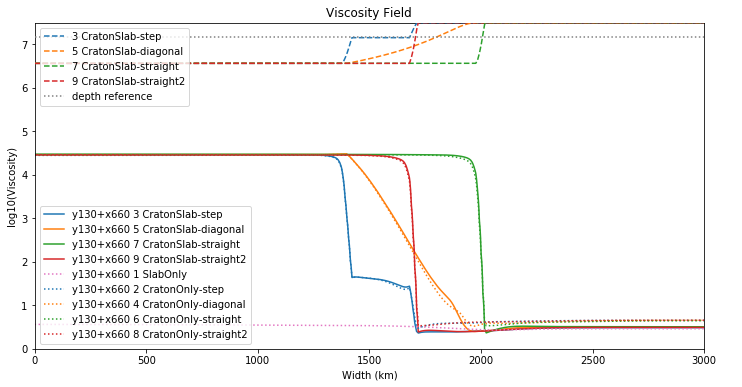

In [15]:
fig, (plot) = pyplot.subplots(1,1)
fig.set_size_inches(12, 6) 

for model in sorted(modelRunDict):
    for swarm in sorted(swarmDict):
        # read swarm coordinates
        pathCoord = inputPath+model+'/'+swarm+'.h5'
        hfCoord = h5py.File(glob.glob(pathCoord)[0], "r")
        coord = hfCoord.get('data').value
        # read in variable data
        path = inputPath+model+'/'+swarm+'_viscosityField.h5'
        for fname in glob.glob(path):
            hf = h5py.File(fname, "r")
            data = hf.get('data').value
            plot.plot(zInKm, np.log10(data), label=swarm+' '+model, linestyle='-', marker='')

plot.set_prop_cycle(None)

for model in sorted(modelRunDict_cratonOnly):
    for swarm in sorted(swarmDict):
        # read swarm coordinates
        pathCoord = inputPath+model+'/'+swarm+'.h5'
        hfCoord = h5py.File(glob.glob(pathCoord)[0], "r")
        coord = hfCoord.get('data').value
        # read in variable data
        path = inputPath+model+'/'+swarm+'_viscosityField.h5'
        for fname in glob.glob(path):
            hf = h5py.File(fname, "r")
            data = hf.get('data').value
            if model[0]=='1':
                plot.plot(zInKm, np.log10(data), label=swarm+' '+model, linestyle=':', marker='', color='C6')
            else:
                plot.plot(zInKm, np.log10(data), label=swarm+' '+model, linestyle=':', marker='')

plot.axis([0, 3e3, 0., 7.5])
plot.set_xlabel('Width (km)')
plot.set_ylabel('log10(Viscosity)')
plot.legend(loc='lower left')

#plot craton and slab location for reference
plot2 = plot.twinx()
for model in sorted(modelRunDict):
    plot2.plot(zInKm, modelRunDict[model], label=model, linestyle='--')
plot2.axis([0, 3e3, -2, 1])
plot2.axhline(tempContour, label='depth reference', linestyle=':', color='grey')
plot2.legend(loc='upper left')
plot2.axis('off')

pyplot.title('Viscosity Field')
pyplot.savefig(fname=inputPath+'/figures-transects/'+swarm+'_fig_z_viscosityField.pdf')

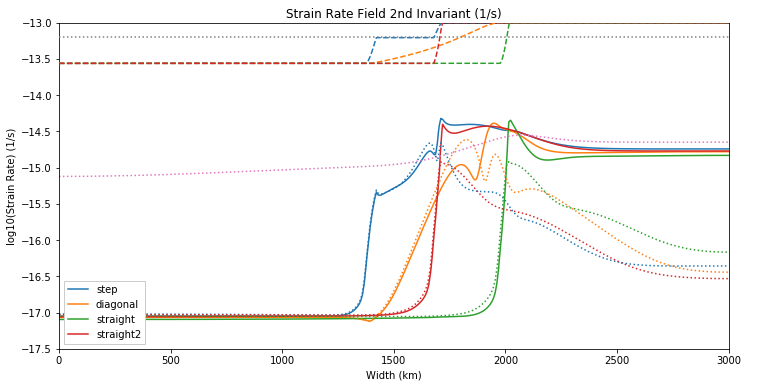

In [16]:
fig, (plot) = pyplot.subplots(1,1)
fig.set_size_inches(12, 6) 

for model in sorted(modelRunDict):
    for swarm in sorted(swarmDict):
        # read swarm coordinates
        pathCoord = inputPath+model+'/'+swarm+'.h5'
        hfCoord = h5py.File(glob.glob(pathCoord)[0], "r")
        coord = hfCoord.get('data').value
        # read in variable data
        path = inputPath+model+'/'+swarm+'_strainRateField.h5'
        for fname in glob.glob(path):
            hf = h5py.File(fname, "r")
            data = hf.get('data').value
            invariant = np.sqrt(0.5*(data[:,0]**2+data[:,1]**2+data[:,2]**2)+data[:,3]**2+data[:,4]**2+data[:,5]**2)
            scaled = invariant * 1.0e-18 # not 2.29568411387e-18 !! 
#             plot.plot(zInKm, np.log10(scaled), label=swarm+' '+model, linestyle='-', marker='')
            plot.plot(zInKm, np.log10(scaled), label=model[13:], linestyle='-', marker='')

plot.set_prop_cycle(None)

for model in sorted(modelRunDict_cratonOnly):
    for swarm in sorted(swarmDict):
        # read swarm coordinates
        pathCoord = inputPath+model+'/'+swarm+'.h5'
        hfCoord = h5py.File(glob.glob(pathCoord)[0], "r")
        coord = hfCoord.get('data').value
        # read in variable data
        path = inputPath+model+'/'+swarm+'_strainRateField.h5'
        for fname in glob.glob(path):
            hf = h5py.File(fname, "r")
            data = hf.get('data').value
            invariant = np.sqrt(0.5*(data[:,0]**2+data[:,1]**2+data[:,2]**2)+data[:,3]**2+data[:,4]**2+data[:,5]**2)
            scaled = invariant * 1.0e-18 # not 2.29568411387e-18 !! 
            if model[0]=='1':
#                 plot.plot(zInKm, np.log10(scaled), label=swarm+' '+model, linestyle=':', marker='', color='C6')
                plot.plot(zInKm, np.log10(scaled), linestyle=':', marker='', color='C6')
            else:
#                 plot.plot(zInKm, np.log10(scaled), label=swarm+' '+model, linestyle=':', marker='')
                 plot.plot(zInKm, np.log10(scaled), linestyle=':', marker='')

            
plot.axis([0, 3e3, -17.5, -13.0])
plot.set_xlabel('Width (km)')
plot.set_ylabel('log10(Strain Rate) (1/s)')
plot.legend(loc='lower left', fancybox=False, framealpha=1.0)

#plot craton and slab location for reference
plot2 = plot.twinx()
for model in sorted(modelRunDict):
#    plot2.plot(zInKm, modelRunDict[model], label=model, linestyle='--')
    plot2.plot(zInKm, modelRunDict[model], linestyle='--')
plot2.axis([0, 3e3, -2, 1])
#plot2.axhline(tempContour, label='depth reference', linestyle=':', color='grey')
plot2.axhline(tempContour, linestyle=':', color='grey')
#plot2.legend(loc='upper left')
plot2.axis('off')

pyplot.title('Strain Rate Field 2nd Invariant (1/s)')
pyplot.savefig(fname=inputPath+'/figures-transects/'+swarm+'_fig_z_strainRateField.pdf')

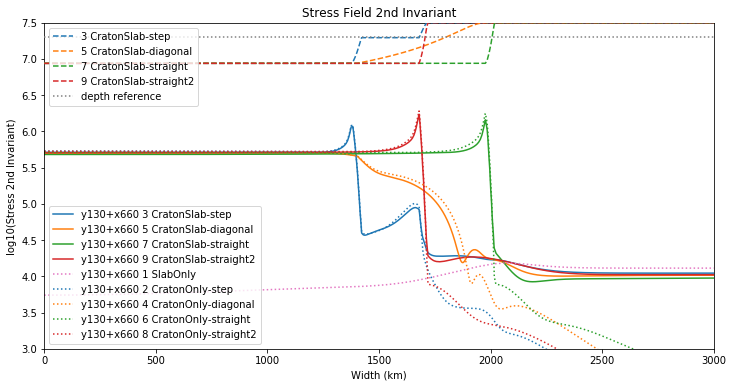

In [17]:
fig, (plot) = pyplot.subplots(1,1)
fig.set_size_inches(12, 6) 

for model in sorted(modelRunDict):
    for swarm in sorted(swarmDict):
        # read swarm coordinates
        pathCoord = inputPath+model+'/'+swarm+'.h5'
        hfCoord = h5py.File(glob.glob(pathCoord)[0], "r")
        coord = hfCoord.get('data').value
        # read in variable data
        path = inputPath+model+'/'+swarm+'_stressField.h5'
        for fname in glob.glob(path):
            hf = h5py.File(fname, "r")
            data = hf.get('data').value
            invariant = np.sqrt(0.5*(data[:,0]**2+data[:,1]**2+data[:,2]**2)+data[:,3]**2+data[:,4]**2+data[:,5]**2)
            plot.plot(zInKm, np.log10(invariant), label=swarm+' '+model, linestyle='-', marker='')

plot.set_prop_cycle(None)

for model in sorted(modelRunDict_cratonOnly):
    for swarm in sorted(swarmDict):
        # read swarm coordinates
        pathCoord = inputPath+model+'/'+swarm+'.h5'
        hfCoord = h5py.File(glob.glob(pathCoord)[0], "r")
        coord = hfCoord.get('data').value
        # read in variable data
        path = inputPath+model+'/'+swarm+'_stressField.h5'
        for fname in glob.glob(path):
            hf = h5py.File(fname, "r")
            data = hf.get('data').value
            invariant = np.sqrt(0.5*(data[:,0]**2+data[:,1]**2+data[:,2]**2)+data[:,3]**2+data[:,4]**2+data[:,5]**2)
            if model[0]=='1':
                plot.plot(zInKm, np.log10(invariant), label=swarm+' '+model, linestyle=':', marker='', color='C6')
            else:
                plot.plot(zInKm, np.log10(invariant), label=swarm+' '+model, linestyle=':', marker='')
            
plot.axis([0, 1e3, 3., 7.5])
plot.set_xlabel('Width (km)')
plot.set_ylabel('log10(Stress 2nd Invariant)')
#plot.legend(loc='lower left')
plot.legend(loc='lower left')

#plot craton and slab location for reference
plot2 = plot.twinx()
for model in sorted(modelRunDict):
    plot2.plot(zInKm, modelRunDict[model], label=model, linestyle='--')
plot2.axis([0, 3e3, -2, 1])
plot2.axhline(tempContour, label='depth reference', linestyle=':', color='grey')
plot2.legend(loc='upper left')
plot2.axis('off')


pyplot.title('Stress Field 2nd Invariant')
pyplot.savefig(fname=inputPath+'/figures-transects/'+swarm+'_fig_z_stressField.pdf')

No handlers could be found for logger "matplotlib.legend"


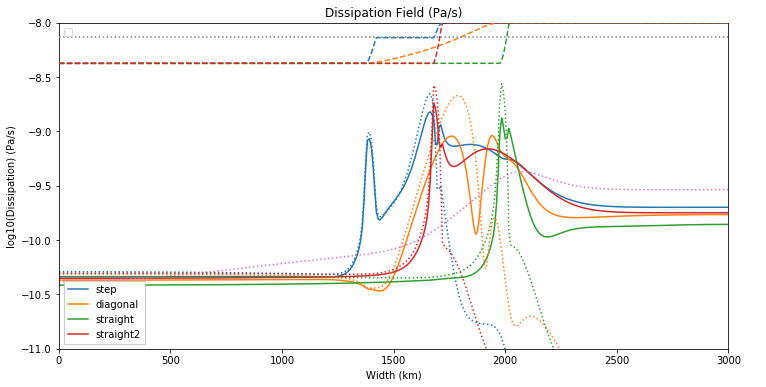

In [18]:
fig, (plot) = pyplot.subplots(1,1)
fig.set_size_inches(12, 6) 

for model in sorted(modelRunDict):
    for swarm in sorted(swarmDict):
        # read swarm coordinates
        pathCoord = inputPath+model+'/'+swarm+'.h5'
        hfCoord = h5py.File(glob.glob(pathCoord)[0], "r")
        coord = hfCoord.get('data').value
        # read in variable data
        path = inputPath+model+'/'+swarm+'_dissipationField.h5'
        for fname in glob.glob(path):
            hf = h5py.File(fname, "r")
            data = hf.get('data').value
            scaled = data * 1.0e-17 # NOT 22.95684113865932  !!
#             plot.plot(zInKm, np.log10(scaled), label=swarm+' '+model, linestyle='-', marker='')
            plot.plot(zInKm, np.log10(scaled), label=model[13:], linestyle='-', marker='')

plot.set_prop_cycle(None)

for model in sorted(modelRunDict_cratonOnly):
    for swarm in sorted(swarmDict):
        # read swarm coordinates
        pathCoord = inputPath+model+'/'+swarm+'.h5'
        hfCoord = h5py.File(glob.glob(pathCoord)[0], "r")
        coord = hfCoord.get('data').value
        # read in variable data
        path = inputPath+model+'/'+swarm+'_dissipationField.h5'
        for fname in glob.glob(path):
            hf = h5py.File(fname, "r")
            data = hf.get('data').value
            # scale dissipation...
            scaled = data * 1.0e-17 # NOT 22.95684113865932  !!
            if model[0]=='1':
#                 plot.plot(zInKm, np.log10(scaled), label=swarm+' '+model, linestyle=':', marker='', color='C6')
                plot.plot(zInKm, np.log10(scaled), linestyle=':', marker='', color='C6')
            else:
#                plot.plot(zInKm, np.log10(scaled), label=swarm+' '+model, linestyle=':', marker='')
                plot.plot(zInKm, np.log10(scaled), linestyle=':', marker='')


plot.axis([0, 3e3, -11., -8])
plot.set_xlabel('Width (km)')
plot.set_ylabel('log10(Dissipation) (Pa/s)')
plot.legend(loc='lower left', fancybox=False, framealpha=1.0)

#plot craton and slab location for reference
plot2 = plot.twinx()
for model in sorted(modelRunDict):
#    plot2.plot(zInKm, modelRunDict[model], label=model, linestyle='--')
    plot2.plot(zInKm, modelRunDict[model], linestyle='--')
plot2.axis([0, 3e3, -2, 1])
#plot2.axhline(tempContour, label='depth reference', linestyle=':', color='grey')
plot2.axhline(tempContour, linestyle=':', color='grey')
plot2.legend(loc='upper left')
plot2.axis('off')

pyplot.title('Dissipation Field (Pa/s)')
pyplot.savefig(fname=inputPath+'/figures-transects/'+swarm+'_fig_z_dissipationField.pdf')

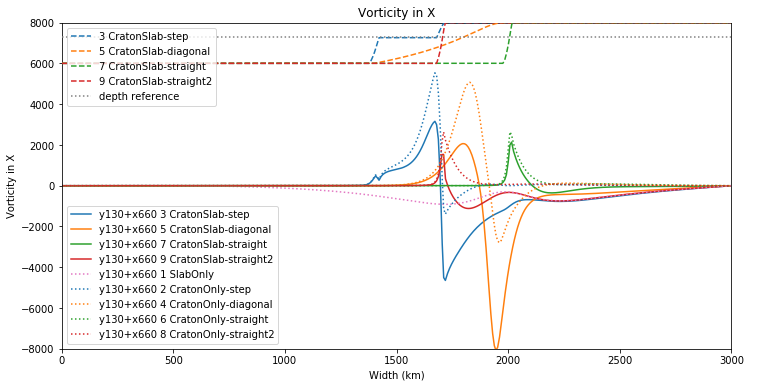

In [19]:
fig, (plot) = pyplot.subplots(1,1)
fig.set_size_inches(12, 6) 

for model in sorted(modelRunDict):
    for swarm in sorted(swarmDict):
        # read swarm coordinates
        pathCoord = inputPath+model+'/'+swarm+'.h5'
        hfCoord = h5py.File(glob.glob(pathCoord)[0], "r")
        coord = hfCoord.get('data').value
        # read in variable data
        path = inputPath+model+'/'+swarm+'_vorticityXField.h5'
        for fname in glob.glob(path):
            hf = h5py.File(fname, "r")
            data = hf.get('data').value
            plot.plot(zInKm, data, label=swarm+' '+model, linestyle='-', marker='')

plot.set_prop_cycle(None)

for model in sorted(modelRunDict_cratonOnly):
    for swarm in sorted(swarmDict):
        # read swarm coordinates
        pathCoord = inputPath+model+'/'+swarm+'.h5'
        hfCoord = h5py.File(glob.glob(pathCoord)[0], "r")
        coord = hfCoord.get('data').value
        # read in variable data
        path = inputPath+model+'/'+swarm+'_vorticityXField.h5'
        for fname in glob.glob(path):
            hf = h5py.File(fname, "r")
            data = hf.get('data').value
            if model[0]=='1':
                plot.plot(zInKm, data, label=swarm+' '+model, linestyle=':', marker='', color='C6')
            else:
                plot.plot(zInKm, data, label=swarm+' '+model, linestyle=':', marker='')
            # for path = inputPath+model+'/'+swarm+'_velocityGradientField.h5'
            # omega_y = (data[:,2]-data[:,6])
            
plot.axis([0, 3e3, -8.e3, 8.e3])
plot.set_xlabel('Width (km)')
plot.set_ylabel('Vorticity in X')
plot.legend(loc='lower left')

#plot craton and slab location for reference
plot2 = plot.twinx()
for model in sorted(modelRunDict):
    plot2.plot(zInKm, modelRunDict[model], label=model, linestyle='--')
plot2.axis([0, 3e3, -2, 1])
plot2.axhline(tempContour, label='depth reference', linestyle=':', color='grey')
plot2.legend(loc='upper left')
plot2.axis('off')

pyplot.title('Vorticity in X')
pyplot.savefig(fname=inputPath+'/figures-transects/'+swarm+'_fig_z_vorticityX.pdf')

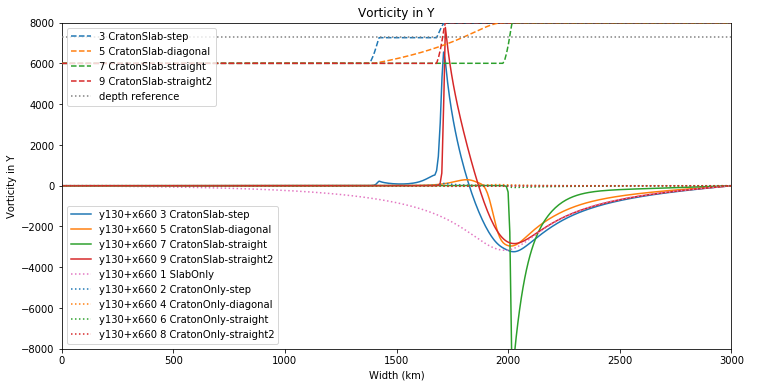

In [20]:
fig, (plot) = pyplot.subplots(1,1)
fig.set_size_inches(12, 6) 

for model in sorted(modelRunDict):
    for swarm in sorted(swarmDict):
        # read swarm coordinates
        pathCoord = inputPath+model+'/'+swarm+'.h5'
        hfCoord = h5py.File(glob.glob(pathCoord)[0], "r")
        coord = hfCoord.get('data').value
        # read in variable data
        path = inputPath+model+'/'+swarm+'_vorticityYField.h5'
        for fname in glob.glob(path):
            hf = h5py.File(fname, "r")
            data = hf.get('data').value
            plot.plot(zInKm, data, label=swarm+' '+model, linestyle='-', marker='')

plot.set_prop_cycle(None)

for model in sorted(modelRunDict_cratonOnly):
    for swarm in sorted(swarmDict):
        # read swarm coordinates
        pathCoord = inputPath+model+'/'+swarm+'.h5'
        hfCoord = h5py.File(glob.glob(pathCoord)[0], "r")
        coord = hfCoord.get('data').value
        # read in variable data
        path = inputPath+model+'/'+swarm+'_vorticityYField.h5'
        for fname in glob.glob(path):
            hf = h5py.File(fname, "r")
            data = hf.get('data').value
            if model[0]=='1':
                plot.plot(zInKm, data, label=swarm+' '+model, linestyle=':', marker='', color='C6')
            else:
                plot.plot(zInKm, data, label=swarm+' '+model, linestyle=':', marker='')
            # for path = inputPath+model+'/'+swarm+'_velocityGradientField.h5'
            # omega_y = (data[:,2]-data[:,6])
            
plot.axis([-1.5, 1.5, -8.e3, 8.e3])
plot.set_xlabel('Width (km)')
plot.set_ylabel('Vorticity in Y')
plot.legend(loc='lower left')

#plot craton and slab location for reference
plot2 = plot.twinx()
for model in sorted(modelRunDict):
    plot2.plot(zInKm, modelRunDict[model], label=model, linestyle='--')
plot2.axis([0, 3e3, -2, 1])
plot2.axhline(tempContour, label='depth reference', linestyle=':', color='grey')
plot2.legend(loc='upper left')
plot2.axis('off')

pyplot.title('Vorticity in Y')
pyplot.savefig(fname=inputPath+'/figures-transects/'+swarm+'_fig_z_vorticityY.pdf')

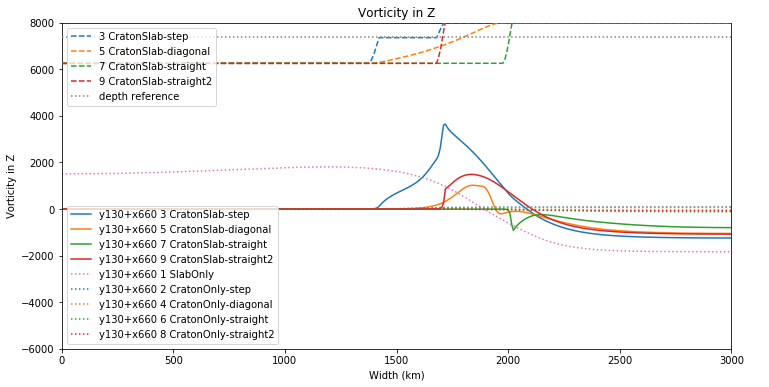

In [21]:
fig, (plot) = pyplot.subplots(1,1)
fig.set_size_inches(12, 6) 

for model in sorted(modelRunDict):
    for swarm in sorted(swarmDict):
        # read swarm coordinates
        pathCoord = inputPath+model+'/'+swarm+'.h5'
        hfCoord = h5py.File(glob.glob(pathCoord)[0], "r")
        coord = hfCoord.get('data').value
        # read in variable data
        path = inputPath+model+'/'+swarm+'_vorticityZField.h5'
        for fname in glob.glob(path):
            hf = h5py.File(fname, "r")
            data = hf.get('data').value
            plot.plot(zInKm, data, label=swarm+' '+model, linestyle='-', marker='')

plot.set_prop_cycle(None)

for model in sorted(modelRunDict_cratonOnly):
    for swarm in sorted(swarmDict):
        # read swarm coordinates
        pathCoord = inputPath+model+'/'+swarm+'.h5'
        hfCoord = h5py.File(glob.glob(pathCoord)[0], "r")
        coord = hfCoord.get('data').value
        # read in variable data
        path = inputPath+model+'/'+swarm+'_vorticityZField.h5'
        for fname in glob.glob(path):
            hf = h5py.File(fname, "r")
            data = hf.get('data').value
            if model[0]=='1':
                plot.plot(zInKm, data, label=swarm+' '+model, linestyle=':', marker='', color='C6')
            else:
                plot.plot(zInKm, data, label=swarm+' '+model, linestyle=':', marker='')
            # for path = inputPath+model+'/'+swarm+'_velocityGradientField.h5'
            # omega_y = (data[:,2]-data[:,6])
            
plot.axis([0, 3e3, -6.e3, 8.e3])
plot.set_xlabel('Width (km)')
plot.set_ylabel('Vorticity in Z')
plot.legend(loc='lower left')

#plot craton and slab location for reference
plot2 = plot.twinx()
for model in sorted(modelRunDict):
    plot2.plot(zInKm, modelRunDict[model], label=model, linestyle='--')
plot2.axis([0, 3e3, -2, 1])
plot2.axhline(tempContour, label='depth reference', linestyle=':', color='grey')
plot2.legend(loc='upper left')
plot2.axis('off')

pyplot.title('Vorticity in Z')
pyplot.savefig(fname=inputPath+'/figures-transects/'+swarm+'_fig_z_vorticityZ.pdf')

** vorticity magnitude**

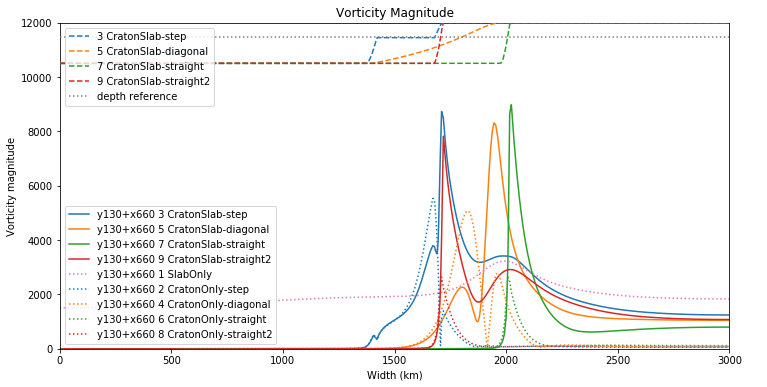

In [22]:
fig, (plot) = pyplot.subplots(1,1)
fig.set_size_inches(12, 6) 

for model in sorted(modelRunDict):
    for swarm in sorted(swarmDict):
        # read swarm coordinates
        pathCoord = inputPath+model+'/'+swarm+'.h5'
        hfCoord = h5py.File(glob.glob(pathCoord)[0], "r")
        coord = hfCoord.get('data').value
        # read in variable data
        path = inputPath+model+'/'+swarm+'_velocityGradientField.h5'
        for fname in glob.glob(path):
            hf = h5py.File(fname, "r")
            data = hf.get('data').value
            magnitude = np.sqrt((data[:,7]-data[:,5])**2+(data[:,2]-data[:,6])**2+(data[:,3]-data[:,1])**2)
            plot.plot(zInKm, magnitude, label=swarm+' '+model, linestyle='-', marker='')

plot.set_prop_cycle(None)

for model in sorted(modelRunDict_cratonOnly):
    for swarm in sorted(swarmDict):
        # read swarm coordinates
        pathCoord = inputPath+model+'/'+swarm+'.h5'
        hfCoord = h5py.File(glob.glob(pathCoord)[0], "r")
        coord = hfCoord.get('data').value
        # read in variable data
        path = inputPath+model+'/'+swarm+'_velocityGradientField.h5'
        for fname in glob.glob(path):
            hf = h5py.File(fname, "r")
            data = hf.get('data').value
            magnitude = np.sqrt((data[:,7]-data[:,5])**2+(data[:,2]-data[:,6])**2+(data[:,3]-data[:,1])**2)
            if model[0]=='1':
                plot.plot(zInKm, magnitude, label=swarm+' '+model, linestyle=':', marker='', color='C6')
            else:
                plot.plot(zInKm, magnitude, label=swarm+' '+model, linestyle=':', marker='')
            # for path = inputPath+model+'/'+swarm+'_velocityGradientField.h5'
            # omega_y = (data[:,2]-data[:,6])
            
plot.axis([0, 3e3, 0., 12e3])
plot.set_xlabel('Width (km)')
plot.set_ylabel('Vorticity magnitude')
plot.legend(loc='lower left')

#plot craton and slab location for reference
plot2 = plot.twinx()
for model in sorted(modelRunDict):
    plot2.plot(zInKm, modelRunDict[model], label=model, linestyle='--')
plot2.axis([0, 3e3, -2, 1])
plot2.axhline(tempContour, label='depth reference', linestyle=':', color='grey')
plot2.legend(loc='upper left')
plot2.axis('off')

pyplot.title('Vorticity Magnitude')
pyplot.savefig(fname=inputPath+'/figures-transects/'+swarm+'_fig_z_vorticityMagnitude.pdf')

** velocity plots!**

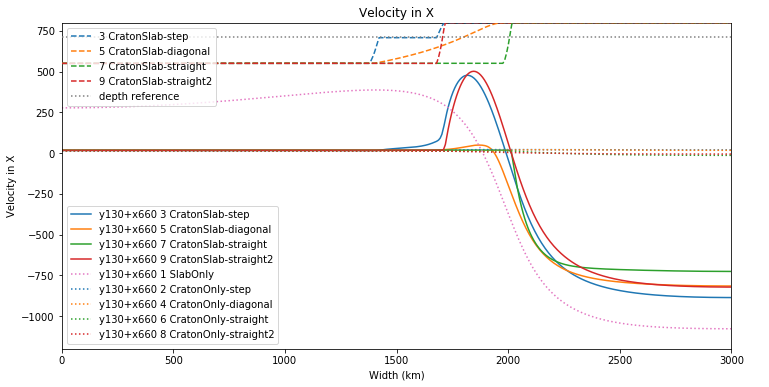

In [70]:
fig, (plot) = pyplot.subplots(1,1)
fig.set_size_inches(12, 6) 

for model in sorted(modelRunDict):
    for swarm in sorted(swarmDict):
        # read swarm coordinates
        pathCoord = inputPath+model+'/'+swarm+'.h5'
        hfCoord = h5py.File(glob.glob(pathCoord)[0], "r")
        coord = hfCoord.get('data').value
        # read in variable data
        path = inputPath+model+'/'+swarm+'_velocityField.h5'
        for fname in glob.glob(path):
            hf = h5py.File(fname, "r")
            data = hf.get('data').value
            plot.plot(zInKm, data[:,0], label=swarm+' '+model, linestyle='-', marker='')

plot.set_prop_cycle(None)

for model in sorted(modelRunDict_cratonOnly):
    for swarm in sorted(swarmDict):
        # read swarm coordinates
        pathCoord = inputPath+model+'/'+swarm+'.h5'
        hfCoord = h5py.File(glob.glob(pathCoord)[0], "r")
        coord = hfCoord.get('data').value
        # read in variable data
        path = inputPath+model+'/'+swarm+'_velocityField.h5'
        for fname in glob.glob(path):
            hf = h5py.File(fname, "r")
            data = hf.get('data').value
            if model[0]=='1':
                plot.plot(zInKm, data[:,0], label=swarm+' '+model, linestyle=':', marker='', color='C6')
            else:
                plot.plot(zInKm, data[:,0], label=swarm+' '+model, linestyle=':', marker='')
            # for path = inputPath+model+'/'+swarm+'_velocityGradientField.h5'
            # omega_y = (data[:,2]-data[:,6])
            
plot.axis([0, 3e3, -1.2e3, 0.8e3])
#plot.axis([0, 3e3, -200, 200])
plot.set_xlabel('Width (km)')
plot.set_ylabel('Velocity in X')
plot.legend(loc='lower left')

#plot craton and slab location for reference
plot2 = plot.twinx()
for model in sorted(modelRunDict):
    plot2.plot(zInKm, modelRunDict[model], label=model, linestyle='--')
plot2.axis([0, 3e3, -2, 1])
plot2.axhline(tempContour, label='depth reference', linestyle=':', color='grey')
plot2.legend(loc='upper left')
plot2.axis('off')

pyplot.title('Velocity in X')
pyplot.savefig(fname=inputPath+'/figures-transects/'+swarm+'_fig_z_velocityX.pdf')
#pyplot.savefig(fname=inputPath+'/figures-transects/'+swarm+'_fig_z_velocityX-zoomIn.pdf')

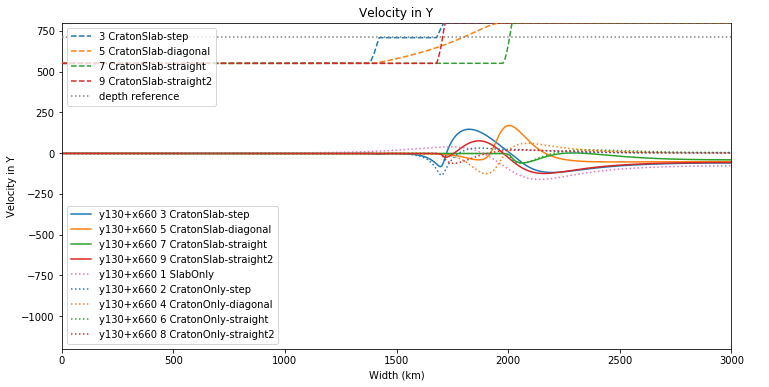

In [71]:
fig, (plot) = pyplot.subplots(1,1)
fig.set_size_inches(12, 6) 

for model in sorted(modelRunDict):
    for swarm in sorted(swarmDict):
        # read swarm coordinates
        pathCoord = inputPath+model+'/'+swarm+'.h5'
        hfCoord = h5py.File(glob.glob(pathCoord)[0], "r")
        coord = hfCoord.get('data').value
        # read in variable data
        path = inputPath+model+'/'+swarm+'_velocityField.h5'
        for fname in glob.glob(path):
            hf = h5py.File(fname, "r")
            data = hf.get('data').value
            plot.plot(zInKm, data[:,1], label=swarm+' '+model, linestyle='-', marker='')

plot.set_prop_cycle(None)

for model in sorted(modelRunDict_cratonOnly):
    for swarm in sorted(swarmDict):
        # read swarm coordinates
        pathCoord = inputPath+model+'/'+swarm+'.h5'
        hfCoord = h5py.File(glob.glob(pathCoord)[0], "r")
        coord = hfCoord.get('data').value
        # read in variable data
        path = inputPath+model+'/'+swarm+'_velocityField.h5'
        for fname in glob.glob(path):
            hf = h5py.File(fname, "r")
            data = hf.get('data').value
            if model[0]=='1':
                plot.plot(zInKm, data[:,1], label=swarm+' '+model, linestyle=':', marker='', color='C6')
            else:
                plot.plot(zInKm, data[:,1], label=swarm+' '+model, linestyle=':', marker='')
            # for path = inputPath+model+'/'+swarm+'_velocityGradientField.h5'
            # omega_y = (data[:,2]-data[:,6])
            
plot.axis([0, 3e3, -1.2e3, 0.8e3])
#plot.axis([0, 3e3, -200, 200])
plot.set_xlabel('Width (km)')
plot.set_ylabel('Velocity in Y')
plot.legend(loc='lower left')

#plot craton and slab location for reference
plot2 = plot.twinx()
for model in sorted(modelRunDict):
    plot2.plot(zInKm, modelRunDict[model], label=model, linestyle='--')
plot2.axis([0, 3e3, -2, 1])
plot2.axhline(tempContour, label='depth reference', linestyle=':', color='grey')
plot2.legend(loc='upper left')
plot2.axis('off')

pyplot.title('Velocity in Y')
pyplot.savefig(fname=inputPath+'/figures-transects/'+swarm+'_fig_z_velocityY.pdf')
#pyplot.savefig(fname=inputPath+'/figures-transects/'+swarm+'_fig_z_velocityY-zoomIn.pdf')

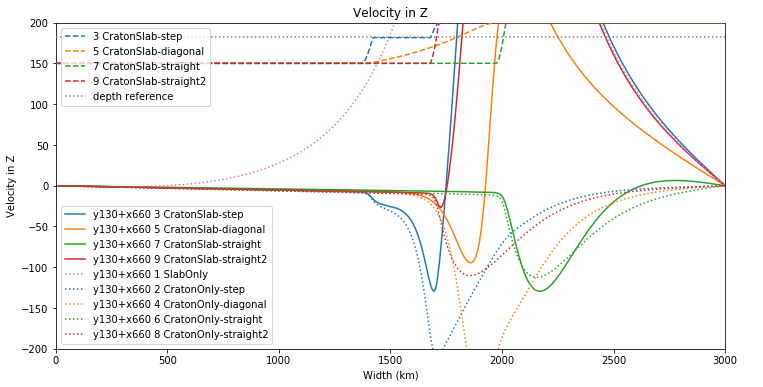

In [73]:
fig, (plot) = pyplot.subplots(1,1)
fig.set_size_inches(12, 6) 

for model in sorted(modelRunDict):
    for swarm in sorted(swarmDict):
        # read swarm coordinates
        pathCoord = inputPath+model+'/'+swarm+'.h5'
        hfCoord = h5py.File(glob.glob(pathCoord)[0], "r")
        coord = hfCoord.get('data').value
        # read in variable data
        path = inputPath+model+'/'+swarm+'_velocityField.h5'
        for fname in glob.glob(path):
            hf = h5py.File(fname, "r")
            data = hf.get('data').value
            plot.plot(zInKm, data[:,2], label=swarm+' '+model, linestyle='-', marker='')

plot.set_prop_cycle(None)

for model in sorted(modelRunDict_cratonOnly):
    for swarm in sorted(swarmDict):
        # read swarm coordinates
        pathCoord = inputPath+model+'/'+swarm+'.h5'
        hfCoord = h5py.File(glob.glob(pathCoord)[0], "r")
        coord = hfCoord.get('data').value
        # read in variable data
        path = inputPath+model+'/'+swarm+'_velocityField.h5'
        for fname in glob.glob(path):
            hf = h5py.File(fname, "r")
            data = hf.get('data').value
            if model[0]=='1':
                plot.plot(zInKm, data[:,2], label=swarm+' '+model, linestyle=':', marker='', color='C6')
            else:
                plot.plot(zInKm, data[:,2], label=swarm+' '+model, linestyle=':', marker='')
            # for path = inputPath+model+'/'+swarm+'_velocityGradientField.h5'
            # omega_y = (data[:,2]-data[:,6])
            
#plot.axis([0, 3e3, -1.2e3, 0.8e3])
plot.axis([0, 3e3, -200, 200])
plot.set_xlabel('Width (km)')
plot.set_ylabel('Velocity in Z')
plot.legend(loc='lower left')

#plot craton and slab location for reference
plot2 = plot.twinx()
for model in sorted(modelRunDict):
    plot2.plot(zInKm, modelRunDict[model], label=model, linestyle='--')
plot2.axis([0, 3e3, -2, 1])
plot2.axhline(tempContour, label='depth reference', linestyle=':', color='grey')
plot2.legend(loc='upper left')
plot2.axis('off')

pyplot.title('Velocity in Z')
#pyplot.savefig(fname=inputPath+'/figures-transects/'+swarm+'_fig_z_velocityZ.pdf')
pyplot.savefig(fname=inputPath+'/figures-transects/'+swarm+'_fig_z_velocityZ-zoomIn.pdf')

1 SlabOnly y130+x660 277.3964595011988
2 CratonOnly-step y130+x660 13.969411581710853
4 CratonOnly-diagonal y130+x660 14.372226804632177
6 CratonOnly-straight y130+x660 14.313123902091624
8 CratonOnly-straight2 y130+x660 6.023223786583856


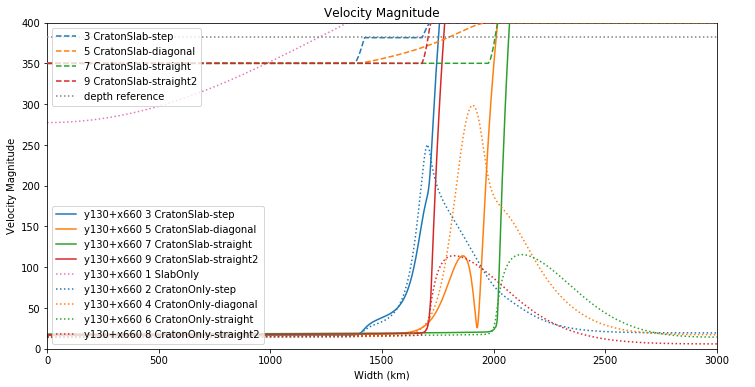

In [76]:
fig, (plot) = pyplot.subplots(1,1)
fig.set_size_inches(12, 6) 

for model in sorted(modelRunDict):
    for swarm in sorted(swarmDict):
        # read swarm coordinates
        pathCoord = inputPath+model+'/'+swarm+'.h5'
        hfCoord = h5py.File(glob.glob(pathCoord)[0], "r")
        coord = hfCoord.get('data').value
        # read in variable data
        path = inputPath+model+'/'+swarm+'_velocityField.h5'
        for fname in glob.glob(path):
            hf = h5py.File(fname, "r")
            data = hf.get('data').value
            magnitude = np.sqrt(data[:,0]**2+data[:,1]**2+data[:,2]**2)
            plot.plot(zInKm, magnitude, label=swarm+' '+model, linestyle='-', marker='')

plot.set_prop_cycle(None)

for model in sorted(modelRunDict_cratonOnly):
    for swarm in sorted(swarmDict):
        # read swarm coordinates
        pathCoord = inputPath+model+'/'+swarm+'.h5'
        hfCoord = h5py.File(glob.glob(pathCoord)[0], "r")
        coord = hfCoord.get('data').value
        # read in variable data
        path = inputPath+model+'/'+swarm+'_velocityField.h5'
        for fname in glob.glob(path):
            hf = h5py.File(fname, "r")
            data = hf.get('data').value
            magnitude = np.sqrt(data[:,0]**2+data[:,1]**2+data[:,2]**2)
            print model, swarm, magnitude.min()
            if model[0]=='1':
                plot.plot(zInKm, magnitude, label=swarm+' '+model, linestyle=':', marker='', color='C6')
            else:
                plot.plot(zInKm, magnitude, label=swarm+' '+model, linestyle=':', marker='')
            
#plot.axis([0, 3e3, 0, 1.2e3])
plot.axis([0, 3e3, 0, 400])
plot.set_xlabel('Width (km)')
plot.set_ylabel('Velocity Magnitude')
plot.legend(loc='lower left')

#plot craton and slab location for reference
plot2 = plot.twinx()
for model in sorted(modelRunDict):
    plot2.plot(zInKm, modelRunDict[model], label=model, linestyle='--')
plot2.axis([0, 3e3, -2, 1])
plot2.axhline(tempContour, label='depth reference', linestyle=':', color='grey')
plot2.legend(loc='upper left')
plot2.axis('off')

pyplot.title('Velocity Magnitude')
#pyplot.savefig(fname=inputPath+'/figures-transects/'+swarm+'_fig_z_velocityMag.pdf')
pyplot.savefig(fname=inputPath+'/figures-transects/'+swarm+'_fig_z_velocityMag-zoomIn.pdf')